# Problem Statement
The Portuguese Bank had run a telemarketing campaign in the past, making sales calls for a term-deposit product. Whether a prospect had bought the product or not is mentioned in the column named 'response'.

The marketing team wants to launch another campaign, and they want to learn from the past one. You, as an analyst, decide to build a supervised model in R and achieve the following goals:

•	Reduce the marketing cost by X% and acquire Y% of the prospects (compared to random calling), where X and Y are to be maximized

•	Present the financial benefit of this project to the marketing team
Data

# Attribute Information:

Input variables:
#### bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
#### related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone') 
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
#### other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
#### social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric) 
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [163]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler,scale
from sklearn.model_selection import train_test_split
sns.set(style="darkgrid") 

In [164]:
df=pd.read_csv('/home/ayush/Downloads/bank-additional-full.csv',sep=";")
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [165]:
df=df.dropna()

In [166]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


# numeric factors assessment 

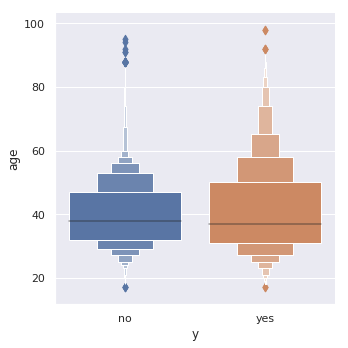

In [167]:
p = sns.catplot(x='y', y='age',kind="boxen",data=df) 

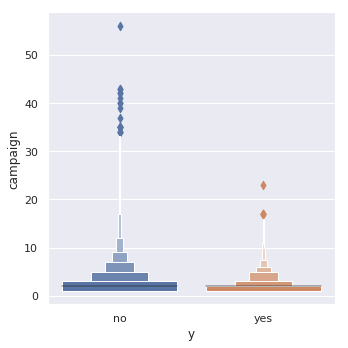

In [168]:
p = sns.catplot(x='y', y='campaign',kind="boxen",data=df) 

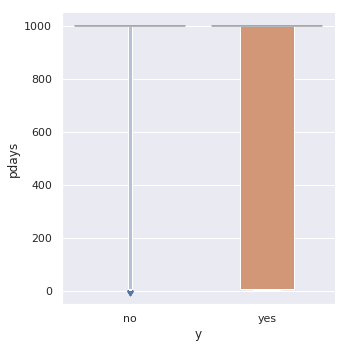

In [169]:
p = sns.catplot(x='y', y='pdays',kind="boxen",data=df) 

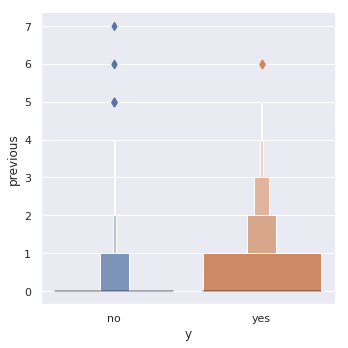

In [170]:
p = sns.catplot(x='y', y='previous',kind="boxen",data=df) 

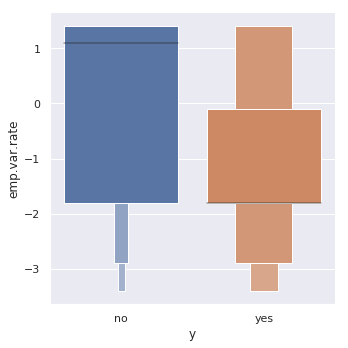

In [171]:
p = sns.catplot(x='y', y='emp.var.rate',kind="boxen",data=df) 

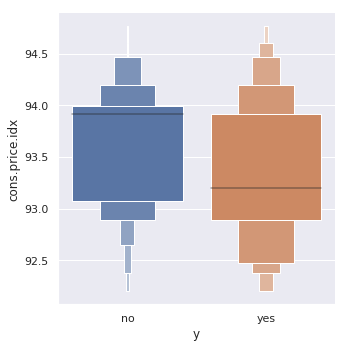

In [172]:
p = sns.catplot(x='y', y='cons.price.idx',kind="boxen",data=df) 

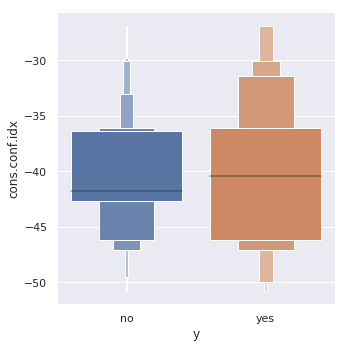

In [173]:
p = sns.catplot(x='y', y='cons.conf.idx',kind="boxen",data=df) 

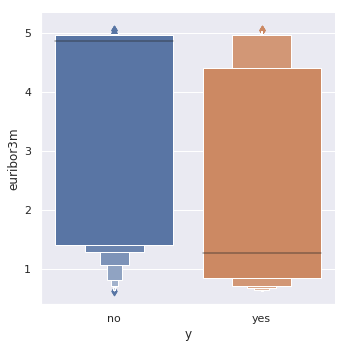

In [174]:
p = sns.catplot(x='y', y='euribor3m',kind="boxen",data=df) 

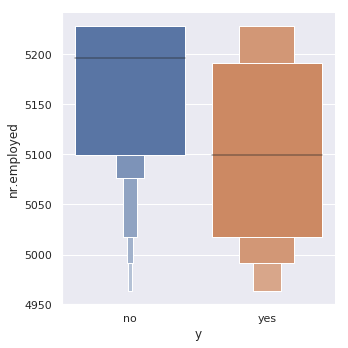

In [175]:
p = sns.catplot(x='y', y='nr.employed',kind="boxen",data=df) 

In [176]:
# adding a column to assign numeric values to y (1 for yes, 0 for no)
l=[]
for index,row in df.iterrows():
    if (row["y"]=="no"):
        l.append(0)
    else:
        l.append(1)
df["y(numeric)"]=l

In [177]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y(numeric)
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


## Multivariate regression on numeric factors

In [178]:
scale=StandardScaler()
x=df[['age','campaign','previous','pdays','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]
y=df['y(numeric)']
x[['age','campaign','previous','pdays','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]=scale.fit_transform(x[['age','campaign','previous','pdays','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']].as_matrix()) # scaling -1 to 1

/home/ayush/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
/home/ayush/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/ayush/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [179]:
x

,age,campaign,previous,pdays,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.533034,-0.565922,-0.349494,0.195414,0.648092,0.722722,0.886447,0.712460,0.331680
1,1.628993,-0.565922,-0.349494,0.195414,0.648092,0.722722,0.886447,0.712460,0.331680
2,-0.290186,-0.565922,-0.349494,0.195414,0.648092,0.722722,0.886447,0.712460,0.331680
3,-0.002309,-0.565922,-0.349494,0.195414,0.648092,0.722722,0.886447,0.712460,0.331680
4,1.533034,-0.565922,-0.349494,0.195414,0.648092,0.722722,0.886447,0.712460,0.331680
5,0.477486,-0.565922,-0.349494,0.195414,0.648092,0.722722,0.886447,0.712460,0.331680
6,1.820911,-0.565922,-0.349494,0.195414,0.648092,0.722722,0.886447,0.712460,0.331680
7,0.093650,-0.565922,-0.349494,0.195414,0.648092,0.722722,0.886447,0.712460,0.331680
8,-1.537652,-0.565922,-0.349494,0.195414,0.648092,0.722722,0.886447,0.712460,0.331680
9,-1.441693,-0.565922,-0.349494,0.195414,0.648092,0.722722,0.886447,0.712460,0.331680


In [180]:
est=sm.OLS(y,x).fit()
est.summary() # look at the coefficients to find the most prominet features (more +ve , more important)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             y(numeric)   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     853.9
Date:                Fri, 08 Mar 2019   Prob (F-statistic):               0.00
Time:                        02:18:15   Log-Likelihood:                -9953.8
No. Observations:               41188   AIC:                         1.993e+04
Df Residuals:                   41179   BIC:                         2.000e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
age                0.0032      0.002      2.091      0.037       0.000       0.006
campaign          -0.0051      0.002     -3.294      0.001      -0.008      -0.002
previous          -0.0185      0.002     -9.090      0.000      -0.022      -0.015
pdays             -0.0754      0.002    -39.114      0.000      -0.079      -0.072
emp.var.rate      -0.0557      0.009     -6.380      0.000      -0.073      -0.039
cons.price.idx     0.0323      0.004      8.442      0.000       0.025       0.040
cons.conf.idx      0.0230      0.002      9.313      0.000       0.018       0.028
euribor3m          0.0065      0.012      0.533      0.594      -0.017       0.030
nr.employed       -0.0673      0.009     -7.875      0.000      -0.084      -0.051
==============================================================================
Omnibus:                    17078.723   Durbin-Watson:                   1.573
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            65639.881
Skew:                           2.113   Prob(JB):                         0.00
Kurtosis:                       7.516   Cond. No.                         19.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### we can clearly see that since cons.price.idx (consumer price index - monthly indicator (numeric)) has the highest positive constant, it is the most prominent feature

# categorical factor assessment 

In [181]:
from matplotlib import pyplot
a4_dims = (16, 8)

{'housemaid': 106, 'services': 323, 'admin.': 1352, 'blue-collar': 638, 'technician': 730, 'retired': 434, 'management': 328, 'unemployed': 144, 'self-employed': 149, 'unknown': 37, 'entrepreneur': 124, 'student': 275}


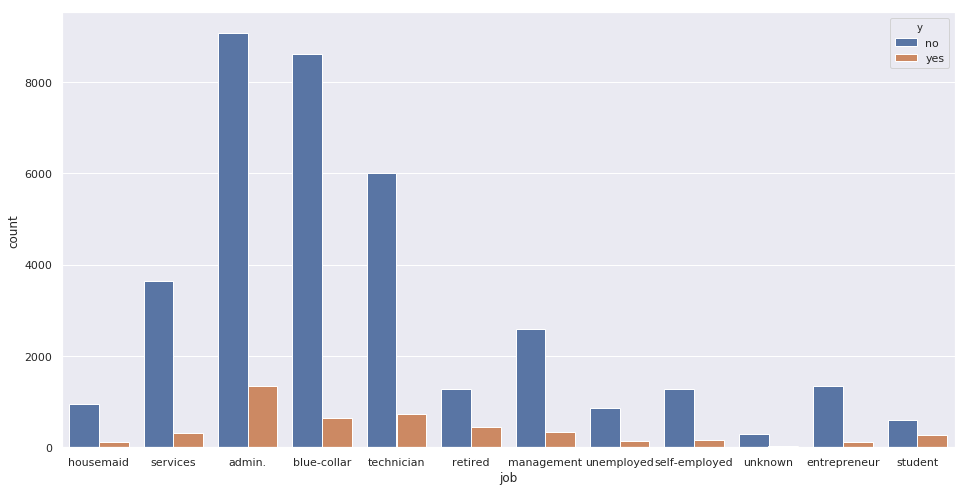

In [182]:
# displaying job by number of 'yes' y values 
dc={}
for x in df.job.unique():
    dc[x]=0
for index,row in df.iterrows():
    if row["y"]=="yes":
        y=df["job"][index]
        dc[y]+=1
print (dc)
fig, ax = pyplot.subplots(figsize=a4_dims)
p = sns.countplot(x='job',hue='y',data=df) 

{'married': 2532, 'single': 1620, 'divorced': 476, 'unknown': 12}


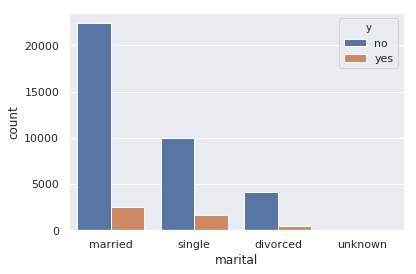

In [183]:
# displaying marital by number of 'yes' y values 
dc1={}
for x in df.marital.unique():
    dc1[x]=0
for index,row in df.iterrows():
    if row["y"]=="yes":
        y=df["marital"][index]
        dc1[y]+=1
print (dc1)
p = sns.countplot(x='marital',hue='y',data=df) 

{'basic.4y': 428, 'high.school': 1031, 'basic.6y': 188, 'basic.9y': 473, 'professional.course': 595, 'unknown': 251, 'university.degree': 1670, 'illiterate': 4}


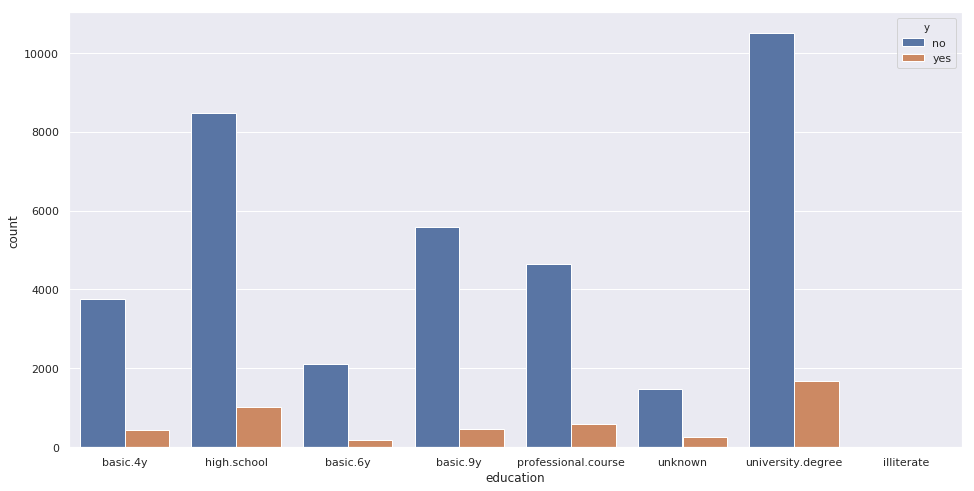

In [184]:
# displaying education by number of 'yes' y values 
dc2={}
for x in df.education.unique():
    dc2[x]=0
for index,row in df.iterrows():
    if row["y"]=="yes":
        y=df["education"][index]
        dc2[y]+=1
print (dc2)
fig, ax = pyplot.subplots(figsize=a4_dims)
p = sns.countplot(x='education',hue='y',data=df) 

{'no': 4197, 'unknown': 443, 'yes': 0}


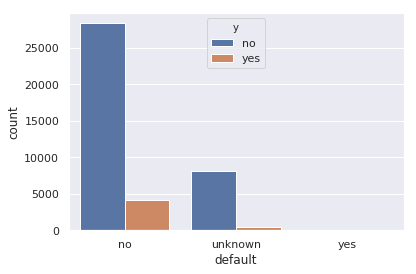

In [185]:
# displaying default by number of 'yes' y values 
dc3={}
for x in df.default.unique():
    dc3[x]=0
for index,row in df.iterrows():
    if row["y"]=="yes":
        y=df["default"][index]
        dc3[y]+=1
print (dc3)
p = sns.countplot(x='default',hue='y',data=df) 

{'no': 2026, 'yes': 2507, 'unknown': 107}


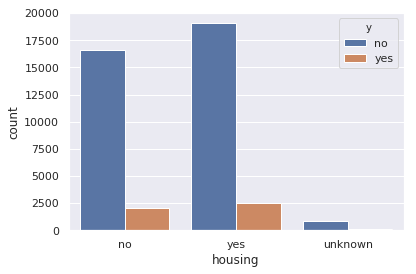

In [186]:
# displaying housing by number of 'yes' y values 
dc4={}
for x in df.housing.unique():
    dc4[x]=0
for index,row in df.iterrows():
    if row["y"]=="yes":
        y=df["housing"][index]
        dc4[y]+=1
print (dc4)
p = sns.countplot(x='housing',hue='y',data=df) 

{'no': 3850, 'yes': 683, 'unknown': 107}


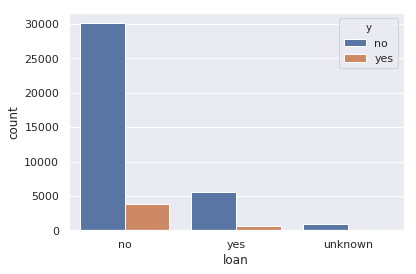

In [187]:
# displaying loan by number of 'yes' y values 
dc5={}
for x in df.loan.unique():
    dc5[x]=0
for index,row in df.iterrows():
    if row["y"]=="yes":
        y=df["loan"][index]
        dc5[y]+=1
print (dc5)
p = sns.countplot(x='loan',hue='y',data=df) 

{'telephone': 787, 'cellular': 3853}


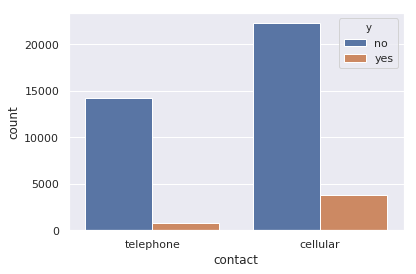

In [188]:
# displaying contact by number of 'yes' y values 
dc6={}
for x in df.contact.unique():
    dc6[x]=0
for index,row in df.iterrows():
    if row["y"]=="yes":
        y=df["contact"][index]
        dc6[y]+=1
print (dc6)
p = sns.countplot(x='contact',hue='y',data=df) 

{'may': 886, 'jun': 559, 'jul': 649, 'aug': 655, 'oct': 315, 'nov': 416, 'dec': 89, 'mar': 276, 'apr': 539, 'sep': 256}


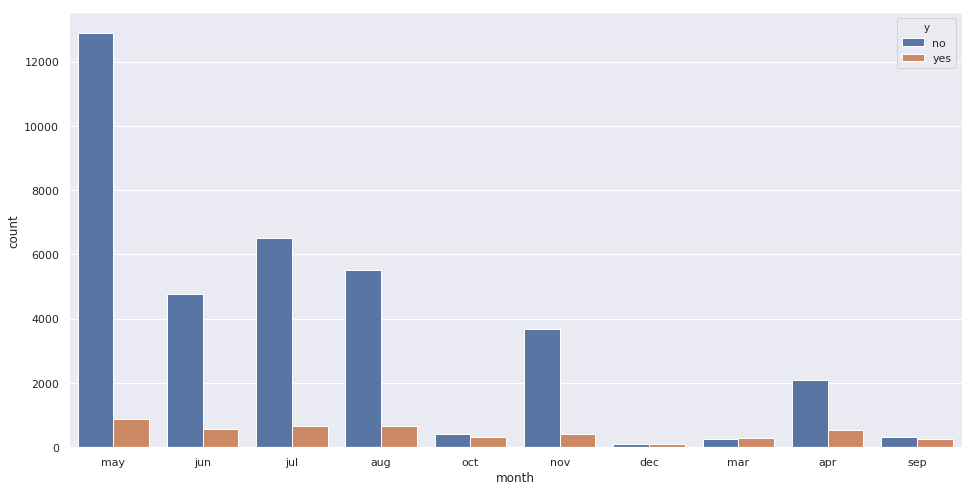

In [189]:
# displaying month by number of 'yes' y values 
dc7={}
for x in df.month.unique():
    dc7[x]=0
for index,row in df.iterrows():
    if row["y"]=="yes":
        y=df["month"][index]
        dc7[y]+=1
print (dc7)
fig, ax = pyplot.subplots(figsize=a4_dims)
p = sns.countplot(x='month', hue='y', data=df)

{'mon': 847, 'tue': 953, 'wed': 949, 'thu': 1045, 'fri': 846}


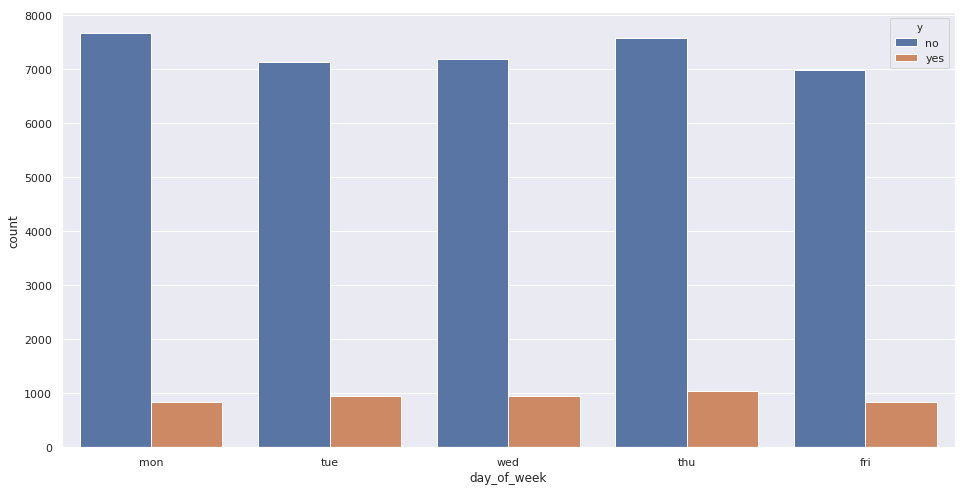

In [190]:
# displaying contact by number of 'yes' y values 
dc8={}
for x in df.day_of_week.unique():
    dc8[x]=0
for index,row in df.iterrows():
    if row["y"]=="yes":
        y=df["day_of_week"][index]
        dc8[y]+=1
print (dc8)
fig, ax = pyplot.subplots(figsize=a4_dims)
p = sns.countplot(x='day_of_week', hue='y', data=df)

{'nonexistent': 3141, 'failure': 605, 'success': 894}


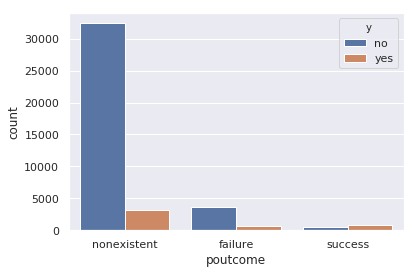

In [191]:
# displaying contact by number of 'yes' y values 
dc9={}
for x in df.poutcome.unique():
    dc9[x]=0
for index,row in df.iterrows():
    if row["y"]=="yes":
        y=df["poutcome"][index]
        dc9[y]+=1
print (dc9)
p = sns.countplot(x='poutcome', hue='y', data=df)

In [192]:
# finding highest 'yes' value containing attribute
print ("highest 'yes' for job =",max(dc, key=dc.get))
print ("highest 'yes' for marital =",max(dc1, key=dc1.get))
print ("highest 'yes' for education =",max(dc2, key=dc2.get))
print ("highest 'yes' for default =",max(dc3, key=dc3.get))
print ("highest 'yes' for housing =",max(dc4, key=dc4.get))
print ("highest 'yes' for loan =",max(dc5, key=dc5.get))
print ("highest 'yes' for contact =",max(dc6, key=dc6.get))
print ("highest 'yes' for month =",max(dc7, key=dc7.get))
print ("highest 'yes' for day_of_week =",max(dc8, key=dc8.get))
print ("highest 'yes' for poutcome =",max(dc9, key=dc9.get))

highest 'yes' for job = admin.
highest 'yes' for marital = married
highest 'yes' for education = university.degree
highest 'yes' for default = no
highest 'yes' for housing = yes
highest 'yes' for loan = no
highest 'yes' for contact = cellular
highest 'yes' for month = may
highest 'yes' for day_of_week = thu
highest 'yes' for poutcome = nonexistent
